In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Define portfolio of stocks and their weights
tickers = ['COIN', 'VOO', 'LMND', 'ACHR']
weights = np.array([0.3, 0.4, 0.2, 0.1])

In [1]:
# Download historical stock data for the past 5 year
data = yf.download(tickers, start='2019-01-01', end='2024-01-01')['Adj Close']

NameError: name 'yf' is not defined

In [6]:
# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate portfolio returns
portfolio_returns = returns.dot(weights)

In [13]:
# Calculate expected annual return
mean_daily_return = portfolio_returns.mean()
annual_return = mean_daily_return * 252
print(f'Expected Annual Return: {annual_return:.2%}')

# Calculate portfolio volatility (annualized)
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
print(f'Annualized Volatility: {portfolio_volatility:.2%}')

# Calculate Sharpe ratio
risk_free_rate = 0.02
sharpe_ratio = (annual_return - risk_free_rate) / portfolio_volatility
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')

# Calculate 5% Value at Risk (VaR)
confidence_level = 0.05
VaR = np.percentile(portfolio_returns, confidence_level * 100)
print(f'Value at Risk (VaR) at {confidence_level:.0%} confidence: {VaR:.2%}')

# Assume an initial investment amount (e.g., $100,000)
initial_value = 100000

# Set the number of years for projection
n_years = 5

# Calculate the future portfolio value after 5 years based on annual return
projected_value = initial_value * (1 + annual_return) ** n_years
print(f'Projected Portfolio Value after {n_years} years: ${projected_value:.2f}')

Expected Annual Return: 54.18%
Annualized Volatility: 22.99%
Sharpe Ratio: 2.27
Value at Risk (VaR) at 5% confidence: -2.19%
Projected Portfolio Value after 5 years: $871376.09


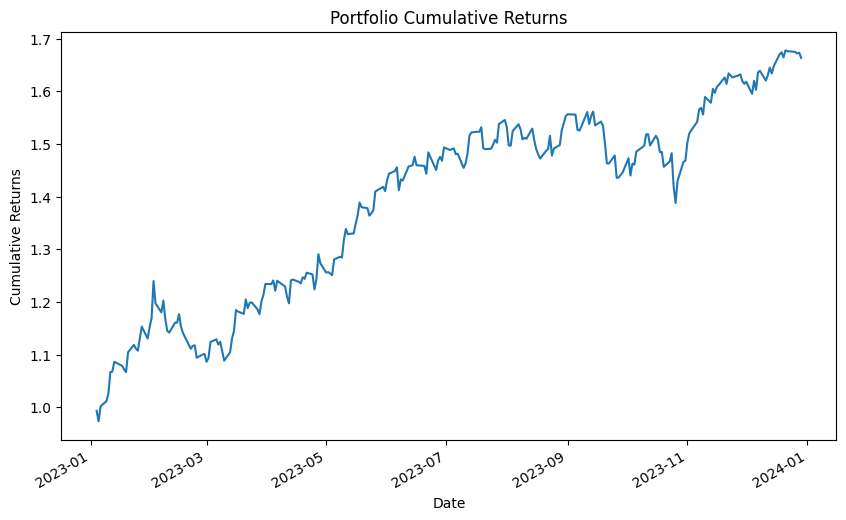

In [12]:
# Plot cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()
plt.figure(figsize=(10, 6))
cumulative_returns.plot(title='Portfolio Cumulative Returns')
plt.ylabel('Cumulative Returns')
plt.show()